In [117]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300 
import numpy as np

x = np.arange(-20, 20, 0.5)

In [118]:
y = 1.0/ (1 + np.exp(-x))

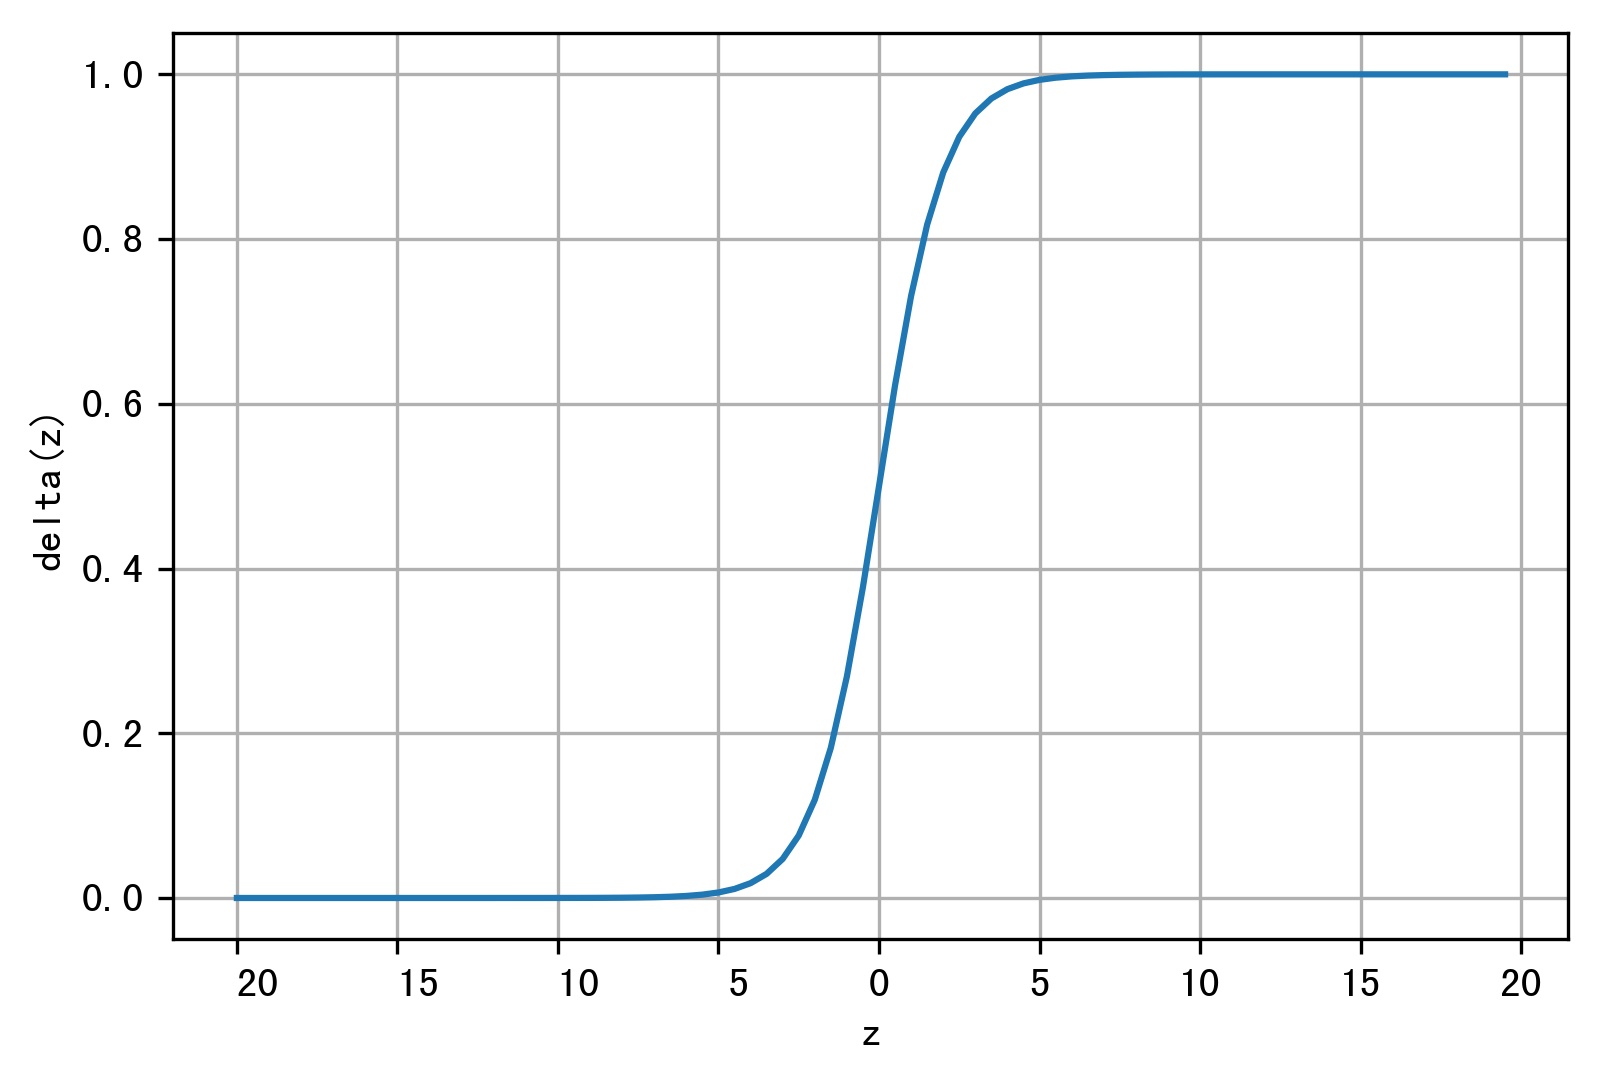

In [119]:
plt.plot(x, y)
plt.xlabel('z')
plt.ylabel('delta(z)')
plt.grid(True)
plt.show()

In [120]:
# 导入pandas and numpy 工具包
import numpy as np
import pandas as pd

In [121]:
# 创造特征列表
column_names = ['Sample code name','Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                'Bare Nuclei','Bland Chromatin','Normal Nuleoli','Mitoses','Class']

In [122]:
# 使用pandas.read_csv函数从互联网读取指定数据
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  names = column_names)

In [123]:
data.head()

,Sample code name,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code name               699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nuleoli                 699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [125]:
#发现Bare Nuclei列里面的特征数值是非数值（object）类型，因此需要仔细查验；统计一下这列特征的数值频率。
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [126]:
data.describe(include='all')

,Sample code name,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [127]:
# 将'?'替换为标准缺失值表示
data = data.replace(to_replace='?',value=np.nan)

In [128]:
data.shape

(699, 11)

In [129]:
# 丢弃带有缺失值的数据(只要有一个维度有缺失)
data = data.dropna(how='any')

In [130]:
# 输出data的数据量和维度
data.shape

(683, 11)

In [131]:
#查看一下肿瘤类别的代表数字，以及各个类别的样本数量。良性肿瘤（2）：444组样本；恶性肿瘤（4）：239组样本。
data['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [132]:
data.describe()

,Sample code name,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nuleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [133]:
# 使用sklearn.model_selection的train_test_split模板用于分割数据
from sklearn.model_selection import train_test_split
# 随机采样25%的数据用于测试，剩下的75%用于构建训练集合
X_train, X_test, y_train, y_test = train_test_split(data[column_names[1:10]],data[column_names[10]],test_size=0.25,random_state=2019)

In [134]:
# 查验训练样本的数量和类别分布
y_train.value_counts()

2    332
4    180
Name: Class, dtype: int64

In [135]:
# 查验测试样本的数量和类别分布
y_test.value_counts()

2    112
4     59
Name: Class, dtype: int64

In [136]:
# 从sklearn.preprocessing导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 从sklearn.linear_model导入LogisticRegression and SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [137]:
# 标准化数据，保证每个维度的特征数据方差为1，均值为0.使得预测结果不会被某些维度过大的特征值主导
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [138]:
# 初始化 LogisticRegression 与 SGDClassifier
lr = LogisticRegression()
sgdc = SGDClassifier()
# 调用fit函数来训练模型参数
lr.fit(X_train,y_train)
# 用predict对X_test进行预测
lr_y_predict = lr.predict(X_test)
sgdc.fit(X_train,y_train)
sgdc_y_predict= sgdc.predict(X_test)

In [139]:
# 从sklearn.metrics 导入 classification_report 模块
from sklearn.metrics import classification_report
# 从sklearn.metrics导入accuracy_score，用来做分类准确率的评估。
from sklearn.metrics import accuracy_score

print('%s: %f'%('使用逻辑斯蒂回归模型做分类的准确率为', accuracy_score(y_test, lr.predict(X_test))))
print('Accuaracy of LR Classifier:',lr.score(X_test, y_test))
print(classification_report(y_test,lr_y_predict,target_names = ['Benign','Malignant']))

使用逻辑斯蒂回归模型做分类的准确率为: 0.970760
Accuaracy of LR Classifier: 0.9707602339181286
              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       112
   Malignant       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [140]:
print('Accuaracy of SGD Classifier:',sgdc.score(X_test, y_test))
print(classification_report(y_test,sgdc_y_predict,target_names = ['Benign','Malignant']))

Accuaracy of SGD Classifier: 0.935672514619883
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95       112
   Malignant       0.93      0.88      0.90        59

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [141]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, lr_y_predict, labels=[2,4])
print(con_mat)

[[109   3]
 [  2  57]]


In [142]:
from sklearn.metrics import recall_score, precision_score, precision_recall_curve
import numpy as np
print(precision_score(y_test, lr_y_predict, pos_label=4))
print(recall_score(y_test, lr_y_predict, pos_label=4))

0.95
0.9661016949152542


In [143]:
lr_y_predict_prob = lr.predict_proba(X_test)

In [144]:
precisions, recalls, thresholds = precision_recall_curve(y_test, np.max(lr_y_predict_prob, axis=1), pos_label=4)

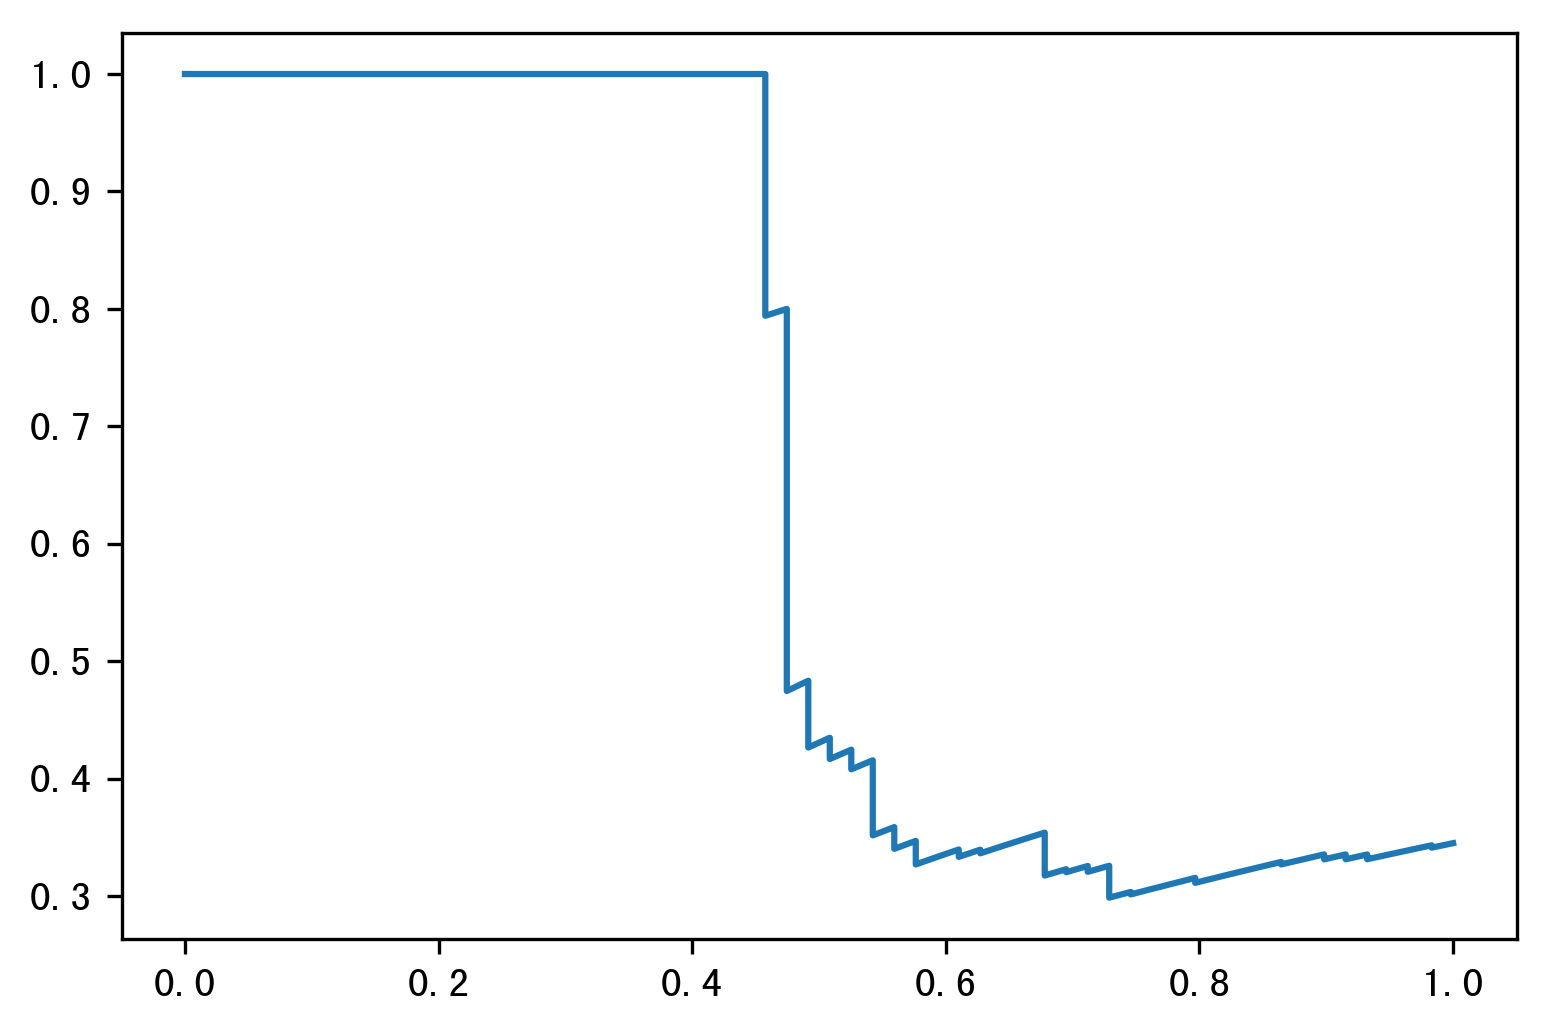

In [145]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.plot(recalls, precisions)